In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

import os

/Users/vega7unk/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
path ='/Users/vega7unk/Documents/3rd_Sem_DSI/Adv_ML/AT2/Project/adv_mla_at2/data'

sales_data = pd.read_csv(f'{path}/df_forecast.csv')

In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47107050 entries, 0 to 47107049
Data columns (total 2 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   total_sales  float64
dtypes: float64(1), object(1)
memory usage: 718.8+ MB


In [5]:
np.float_ = np.float64

In [6]:
sales_data['date'] = pd.to_datetime(sales_data['date'])
total_sales = sales_data.groupby('date')['total_sales'].sum().reset_index()
total_sales.rename(columns={'date': 'ds', 'total_sales': 'y'}, inplace=True)

In [7]:
from prophet import Prophet

# Initialize and fit the Prophet model
model = Prophet()
model.fit(total_sales)

22:11:23 - cmdstanpy - INFO - Chain [1] start processing
22:11:23 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
import joblib

joblib.dump(model, '/Users/vega7unk/Documents/3rd_Sem_DSI/Adv_ML/AT2/Project/adv_mla_at2/models/forecasting/prophet_sales_model.pkl')
print("Model saved as 'prophet_sales_model.pkl'")

Model saved as 'prophet_sales_model.pkl'


In [9]:
# Forecast the next 7 days
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

In [10]:
# Extract the predictions for the next 7 days
forecast_7_days = forecast[['ds', 'yhat']].tail(7)

In [11]:
train_data = total_sales[:-30]
test_data = total_sales[-30:]

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluate the model on the test set
test_predictions = model.predict(test_data[['ds']])
test_rmse = np.sqrt(mean_squared_error(test_data['y'], test_predictions['yhat']))
test_mae = mean_absolute_error(test_data['y'], test_predictions['yhat'])

In [13]:
print(f'Test RMSE: {test_rmse:.4f}')
print(f'Test MAE: {test_mae:.4f}')

Test RMSE: 8373.5044
Test MAE: 6515.9304


In [14]:
# Display the forecasted sales for the next 7 days
print("Forecasted Sales for the Next 7 Days:")
print(forecast_7_days)

Forecasted Sales for the Next 7 Days:
             ds           yhat
1541 2015-04-19  135147.218772
1542 2015-04-20  109980.678098
1543 2015-04-21  102701.730847
1544 2015-04-22  101755.823007
1545 2015-04-23  101867.159767
1546 2015-04-24  113398.196329
1547 2015-04-25  133553.735986


In [15]:
from joblib import dump

dump(model, '/Users/vega7unk/Documents/3rd_Sem_DSI/Adv_ML/AT2/Project/adv_mla_at2/models/forecasting/forecasting_model.joblib')

['/Users/vega7unk/Documents/3rd_Sem_DSI/Adv_ML/AT2/Project/adv_mla_at2/models/forecasting/forecasting_model.joblib']

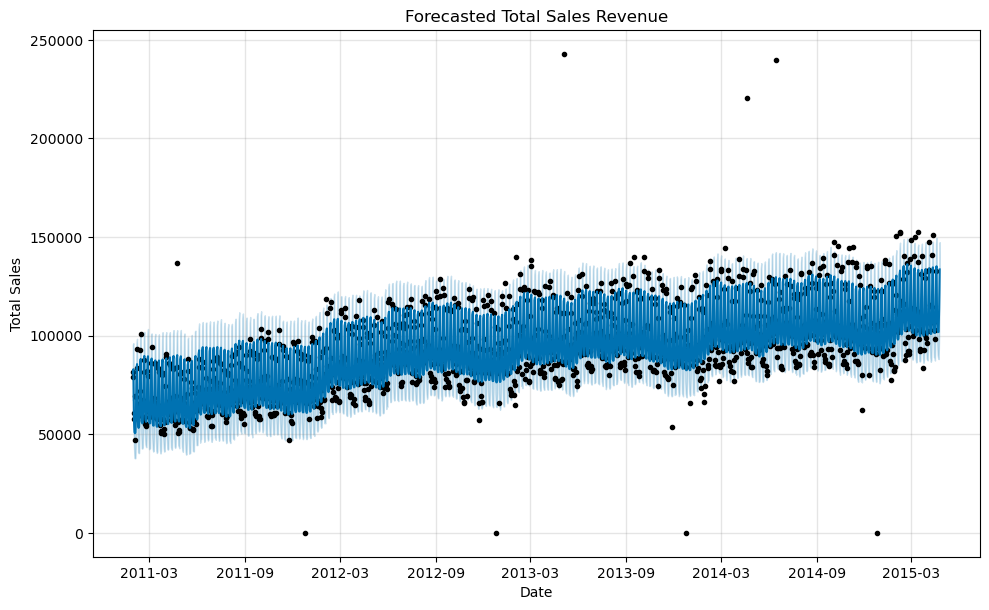

In [16]:
import matplotlib.pyplot as plt

# Plot the complete forecast (including historical data and the next 7 days)
fig = model.plot(forecast)
plt.title("Forecasted Total Sales Revenue")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


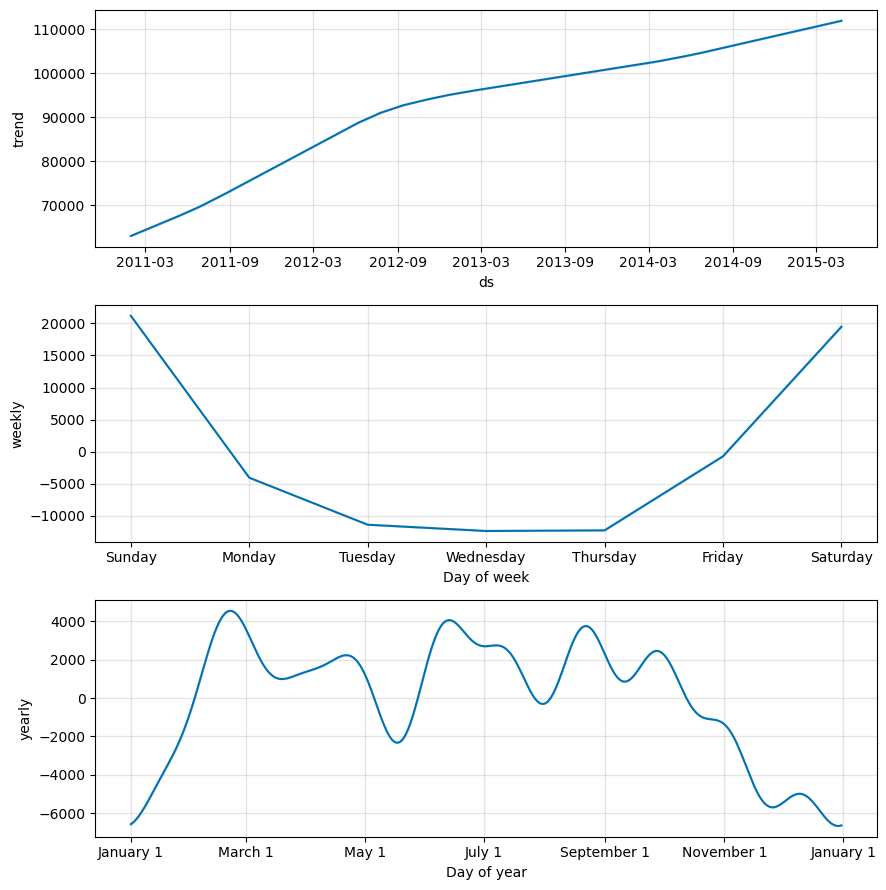

In [17]:
fig2 = model.plot_components(forecast)
plt.show()

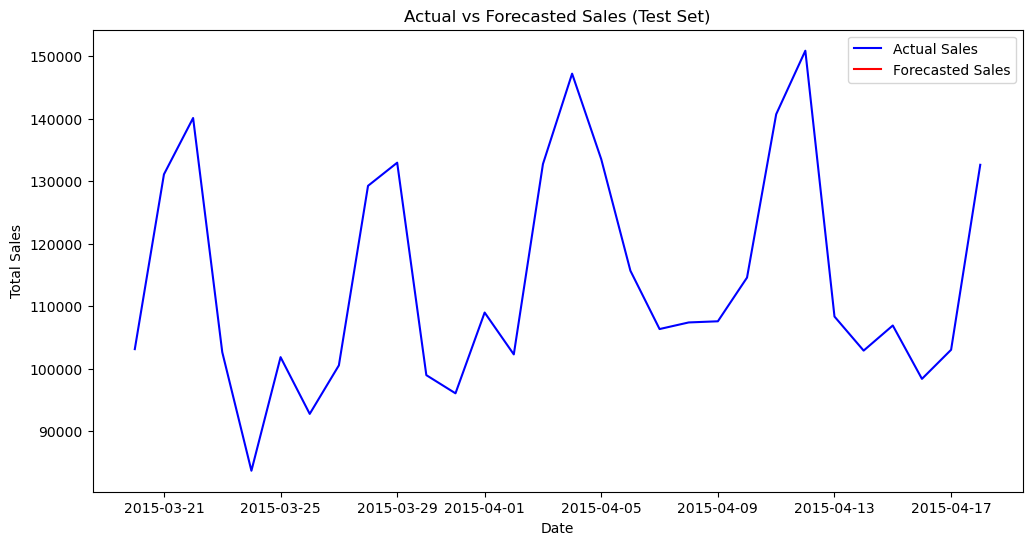

In [18]:
# Merge actual and forecasted values to visualize them together
test_data = test_data.copy()
test_data['forecasted'] = test_predictions['yhat']

# Plot the actual vs forecasted sales for the test set
plt.figure(figsize=(12, 6))
plt.plot(test_data['ds'], test_data['y'], label='Actual Sales', color='blue')
plt.plot(test_data['ds'], test_data['forecasted'], label='Forecasted Sales', color='red')
plt.title('Actual vs Forecasted Sales (Test Set)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

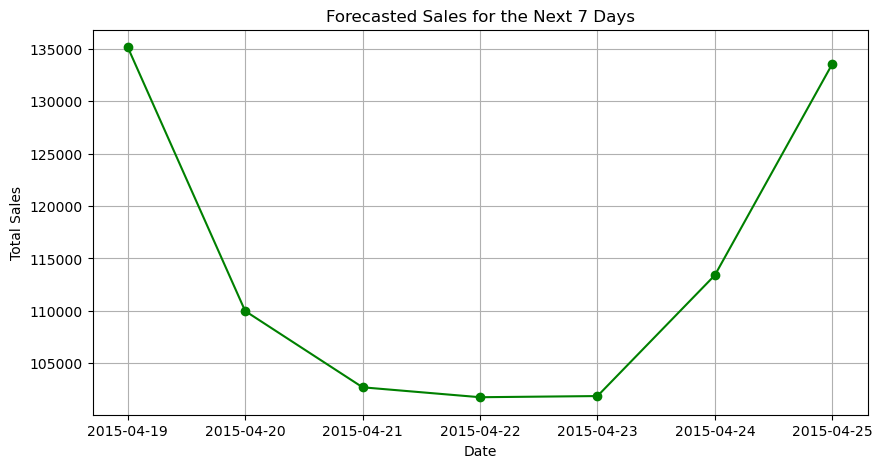

In [19]:
# Plot the forecasted sales for the next 7 days
plt.figure(figsize=(10, 5))
plt.plot(forecast_7_days['ds'], forecast_7_days['yhat'], marker='o', linestyle='-', color='green')
plt.title('Forecasted Sales for the Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()